In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('C:/Users/signi/Downloads/Titanic_Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop('Cabin',axis=1,inplace=True)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
mean_male = round(data[data.Sex=="male"]['Age'].mean())
mean_female = round(data[data.Sex=="female"]['Age'].mean())

In [8]:
data['Age'].fillna(value=mean_male, inplace=True)
data['Age'].fillna(value=mean_female, inplace=True)

In [13]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [11]:
data['Embarked'] = data['Embarked'].fillna('S')

In [15]:
#Adding onehot encoding
dummy = pd.get_dummies(data['Sex'], drop_first=True)
data = pd.concat([data.reset_index(drop=True),dummy],axis=1)
data
# data = data.drop('Type',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,31.0,1,2,W./C. 6607,23.4500,S,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,1


In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


In [28]:
# data.drop('Embarked', axis = 1,inplace = True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
888,0,3,31.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [281]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
Survived,1.000000,-0.338481,-0.073432,-0.035322,0.081629,0.257307,0.003650,-0.149683,-0.543351
Pclass,-0.338481,1.000000,-0.324173,0.083081,0.018443,-0.549500,0.221009,0.074053,0.131900
Age,-0.073432,-0.324173,1.000000,-0.231683,-0.184001,0.087474,-0.000378,-0.028958,0.086290
SibSp,-0.035322,0.083081,-0.231683,1.000000,0.414838,0.159651,-0.026354,0.068734,-0.114631
Parch,0.081629,0.018443,-0.184001,0.414838,1.000000,0.216225,-0.081228,0.060814,-0.245489
Fare,0.257307,-0.549500,0.087474,0.159651,0.216225,1.000000,-0.117216,-0.162184,-0.182333
Q,0.003650,0.221009,-0.000378,-0.026354,-0.081228,-0.117216,1.000000,-0.499421,-0.074115
S,-0.149683,0.074053,-0.028958,0.068734,0.060814,-0.162184,-0.499421,1.000000,0.119224
male,-0.543351,0.131900,0.086290,-0.114631,-0.245489,-0.182333,-0.074115,0.119224,1.000000


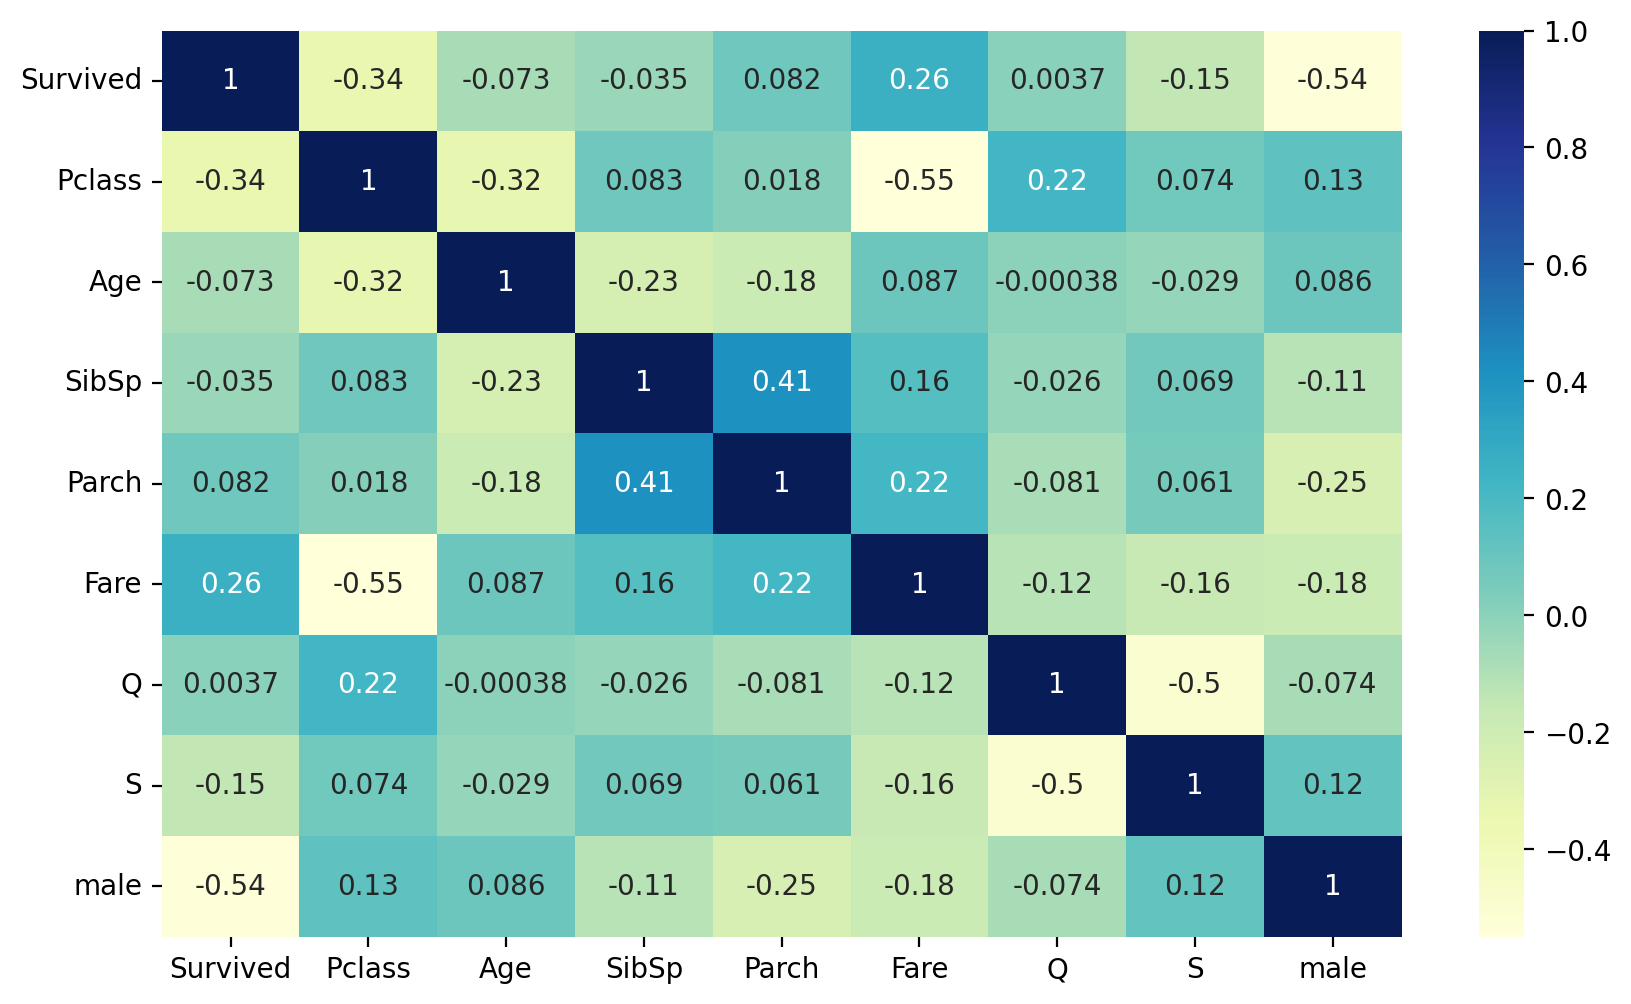

In [287]:
import seaborn as sns
plt.figure(figsize=(10,6),dpi = 200) 
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [252]:
features = ['Survived', 'Pclass','Age', 'SibSp', 'Parch','male', 'Q', 'S']
response = ['Fare']
# X is independent variables
# Y is dependent variable
X=data[features].values
y=data[response].values

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [255]:
model = LinearRegression()

In [256]:
model = model.fit(X_train,y_train)

In [257]:
print(model.coef_)
print(model.intercept_)

[[  3.00888407 -31.03816249  -0.05600417   5.82278066  10.5569046
    1.69759431 -10.85296855 -16.46419061]]
[108.71954889]


In [169]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,6.975573,Pclass
2,4.972732,Age
7,4.871524,S
8,3.744810,male
0,1.954084,Survived
5,1.891405,Fare
6,1.628980,Q
4,1.628686,Parch
3,1.579991,SibSp


In [258]:
y_pred = model.predict(X_train)
df = pd.DataFrame(data = y_train ,columns =['y_train'])
df['y_pred'] = y_pred
df

,y_train,y_pred
0,26.5500,63.067461
1,76.7292,83.768847
2,46.9000,51.010173
3,77.2875,70.447469
4,14.4583,19.691713
...,...,...
618,83.1583,94.885793
619,7.8542,6.908456
620,7.7333,4.713558
621,17.4000,5.956385


In [178]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_train, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R^2: %.2f' % r2_score(y_train, y_pred))


MSE: 1426.47
RMSE: 37.77
R^2: 0.39


In [179]:
y_predict = model.predict(X_test)

In [180]:
df = pd.DataFrame(data = y_test ,columns =['y_test'])
df['y_predict'] = y_predict
df

,y_test,y_predict
0,14.4583,15.566526
1,7.5500,-0.897664
2,29.1250,39.905685
3,146.5208,84.776922
4,15.2458,38.103634
...,...,...
263,0.0000,60.674623
264,15.5000,4.713558
265,14.4542,21.613324
266,7.4958,1.141680


In [261]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_test, y_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_predict)))
print('R^2: %.2f' % r2_score(y_test, y_predict))

MSE: 1712.92
RMSE: 41.39
R^2: 0.39


In [265]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_test)
model = sm.OLS(y_test, X_with_constant)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     24.02
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.84e-27
Time:                        00:46:34   Log-Likelihood:                -1369.3
No. Observations:                 268   AIC:                             2757.
Df Residuals:                     259   BIC:                             2789.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.0779     15.711      8.343      0.000     100.140     162.016
x1             3.1327      6.661      0.470      0.639      -9.983      16.249
x2           -32.8989      3.699     -8.893      0.000     -40.183     -25.614
x3            -0.1485      0.223     -0.665      0.507      -0.588       0.291
x4             7.9937      3.008      2.657      0.008       2.070      13.918
x5             7.3457      3.915      1.876      0.062      -0.364      15.056
x6           -12.4051      6.464     -1.919      0.056     -25.134       0.323
x7           -14.8000     10.959     -1.351      0.178     -36.379       6.779
x8           -23.3710      6.304     -3.707      0.000     -35.784     -10.958
==============================================================================
Omnibus:                      320.451   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23088.680
Skew:                           5.077   Prob(JB):                         0.00
Kurtosis:                      47.323   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Standardization

In [266]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_strain = sc_X.fit_transform(X_train)
X_stest = sc_X.transform(X_test)
sc_y = StandardScaler()
y_strain = sc_y.fit_transform(y_train)
y_stest = sc_y.transform(y_test)

In [267]:
#using sklearn method
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_strain,y_strain)
print(model.coef_)
print(model.intercept_)

[[ 0.03041376 -0.5406902  -0.0151179   0.14031466  0.18202802  0.01673701
  -0.06437669 -0.15037069]]
[9.58840704e-17]


In [268]:
y_pred = model.predict(X_strain)

In [269]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_strain, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_strain, y_pred)))
print('R^2: %.2f' % r2_score(y_strain, y_pred))

MSE: 0.61
RMSE: 0.78
R^2: 0.39


In [270]:
test_predict = model.predict(X_stest)

In [271]:
test_actual = y_stest

In [272]:
print('MSE: %.2f' % mean_squared_error(test_actual, test_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(test_actual, test_predict)))
print('R^2: %.2f' % r2_score(test_actual, test_predict))

MSE: 0.72
RMSE: 0.85
R^2: 0.40


In [273]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     48.35
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           2.10e-60
Time:                        00:47:29   Log-Likelihood:                -3146.4
No. Observations:                 623   AIC:                             6311.
Df Residuals:                     614   BIC:                             6351.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.7195      9.260     11.740      0.000      90.533     126.906
x1             3.0089      4.029      0.747      0.455      -4.903      10.921
x2           -31.0382      2.169    -14.308      0.000     -35.298     -26.778
x3            -0.0560      0.129     -0.433      0.665      -0.310       0.198
x4             5.8228      1.473      3.953      0.000       2.930       8.715
x5            10.5569      2.069      5.102      0.000       6.493      14.621
x6             1.6976      3.966      0.428      0.669      -6.090       9.485
x7           -10.8530      6.624     -1.638      0.102     -23.862       2.156
x8           -16.4642      4.190     -3.929      0.000     -24.693      -8.236
==============================================================================
Omnibus:                      743.523   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79794.587
Skew:                           5.726   Prob(JB):                         0.00
Kurtosis:                      57.247   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normalization

In [274]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
sc_X = MinMaxScaler()
X_ntrain = sc_X.fit_transform(X_train)
X_ntest = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_ntrain = sc_y.fit_transform(y_train)
y_ntest = sc_y.transform(y_test)

In [275]:
#using sklearn method
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_ntrain,y_ntrain)
print(reg.coef_)
print(reg.intercept_)

[[ 0.00587295 -0.12116492 -0.00867179  0.09092249  0.12363423  0.00331348
  -0.02118358 -0.03213596]]
[0.15155073]


In [276]:
y_pred = reg.predict(X_ntrain)

In [277]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_ntrain, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_ntrain, y_pred)))
print('R^2: %.2f' % r2_score(y_ntrain, y_pred))

MSE: 0.01
RMSE: 0.07
R^2: 0.39


In [278]:
y_predict = reg.predict(X_ntest)

In [279]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: %.2f' % mean_squared_error(y_ntest, y_predict))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_ntest, y_predict)))
print('R^2: %.2f' % r2_score(y_ntest, y_predict))

MSE: 0.01
RMSE: 0.08
R^2: 0.40


In [280]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_test)
model = sm.OLS(y_test, X_with_constant)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     24.02
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.84e-27
Time:                        00:49:50   Log-Likelihood:                -1369.3
No. Observations:                 268   AIC:                             2757.
Df Residuals:                     259   BIC:                             2789.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.0779     15.711      8.343      0.000     100.140     162.016
x1             3.1327      6.661      0.470      0.639      -9.983      16.249
x2           -32.8989      3.699     -8.893      0.000     -40.183     -25.614
x3            -0.1485      0.223     -0.665      0.507      -0.588       0.291
x4             7.9937      3.008      2.657      0.008       2.070      13.918
x5             7.3457      3.915      1.876      0.062      -0.364      15.056
x6           -12.4051      6.464     -1.919      0.056     -25.134       0.323
x7           -14.8000     10.959     -1.351      0.178     -36.379       6.779
x8           -23.3710      6.304     -3.707      0.000     -35.784     -10.958
==============================================================================
Omnibus:                      320.451   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23088.680
Skew:                           5.077   Prob(JB):                         0.00
Kurtosis:                      47.323   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso

In [228]:
# Using Lasso (L1 Regularized) Regression Model
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_train)

In [229]:
print(mean_squared_error(y_train,y_pred))
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train, y_pred))

2317.603242423995
48.14149190068786
0.0032086419621270013


In [230]:
y_predict = lasso_reg.predict(X_test)

In [231]:
print(mean_squared_error(y_test,y_predict))
print(np.sqrt(mean_squared_error(y_test,y_predict)))
print(r2_score(y_test, y_predict))

2790.729100071568
52.82735181770489
0.001648684632723052


## Ridge

In [232]:
# Using Ridge (L2 Regularized) Regression Model
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_train)

In [234]:
print(mean_squared_error(y_train,y_pred))
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train, y_pred))

1441.6761360488395
37.969410530700095
0.37994118786272646


In [235]:
y_predict = ridge_reg.predict(X_test)

In [236]:
print(mean_squared_error(y_test,y_predict))
print(np.sqrt(mean_squared_error(y_test,y_predict)))
print(r2_score(y_test,y_predict))

1712.924738475642
41.38749495289177
0.3872208285145088


## Polynomial 

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [239]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [240]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 1.],
       ...,
       [1., 0., 3., ..., 1., 0., 0.],
       [1., 1., 3., ..., 0., 0., 1.],
       [1., 0., 2., ..., 0., 0., 1.]])

In [241]:
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y_train) 

LinearRegression()

In [247]:
#Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X_train)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
# r_square = metrics.r2_score(y_train, y_predict_slr)
# mse = mean_squared_error(y_train, y_predict_slr)

print(mean_squared_error(y_train,y_predict_slr))
print(np.sqrt(mean_squared_error(y_train,y_predict_slr)))
print(r2_score(y_train,y_predict_slr))

1426.4717790436137
37.76866133507532
0.3864805175417273


In [250]:
#Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.5033864591401997


In [251]:
print(mean_squared_error(y_test,y_predict_pr))
print(np.sqrt(mean_squared_error(y_test,y_predict_pr)))
print(r2_score(y_test,y_predict_pr))

1388.202568208337
37.2585905290087
0.5033864591401997
